In [1]:
import tensorflow as tf
import numpy as np
import skimage.color

In [2]:
%load_ext autoreload
%autoreload 1
%aimport nn_graph
%aimport nn_generate_data

In [3]:
input_size = 128

In [4]:
sess = tf.InteractiveSession()

In [5]:
inputs, labels, output_pr, loss, accuracy, conv1_weights = nn_graph.build_graph(input_size=input_size, minibatch_size=1)

In [6]:
fg, bg = nn_generate_data.load_default_textures(w=input_size, h=input_size)
image_rgb, mask = nn_generate_data.random_textured_polygon(fg, bg, w=input_size, h=input_size)
image = skimage.color.rgb2gray(image_rgb)[np.newaxis, :, :, np.newaxis]
nn_generate_data.scale_images(image)
mask  = mask[np.newaxis, :, :]

In [7]:
saver = tf.train.Saver()

In [30]:
saver.restore(sess, '/tmp/nn-detect-log/checkpoint-200')

In [9]:
feed = {inputs: image}
output_pr_value = sess.run(output_pr, feed_dict = feed)

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

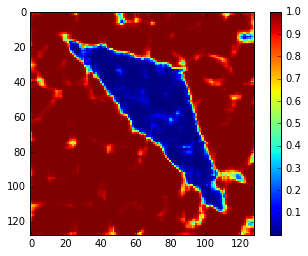

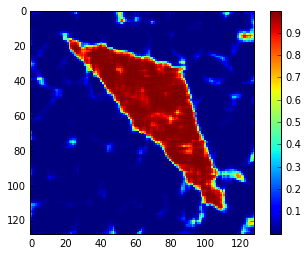

In [12]:
plt.imshow(output_pr_value[0,:,:,0], interpolation='nearest')
plt.colorbar()
plt.figure()
plt.imshow(output_pr_value[0,:,:,1], interpolation='nearest')
plt.colorbar()

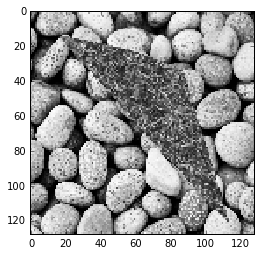

In [13]:
plt.imshow(image[0,:,:,0], interpolation='nearest', cmap=plt.cm.gray)

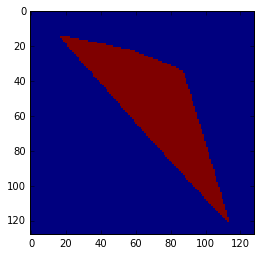

In [14]:
plt.imshow(mask[0,:,:,0], interpolation='nearest')

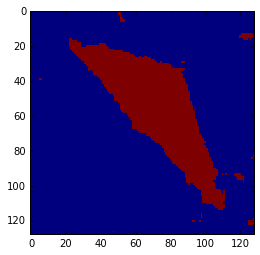

In [15]:
plt.imshow(np.argmax(output_pr_value, axis=3)[0], interpolation='nearest') 

In [28]:
conv1_weight_values = conv1_weights.eval()

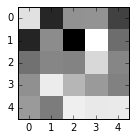

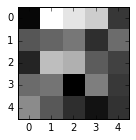

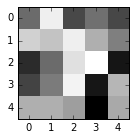

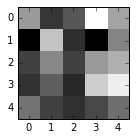

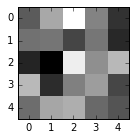

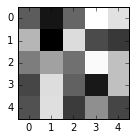

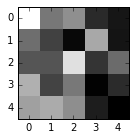

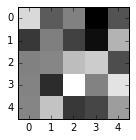

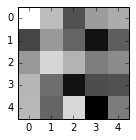

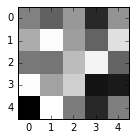

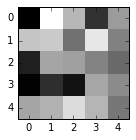

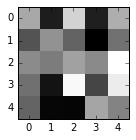

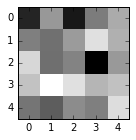

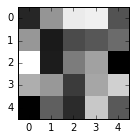

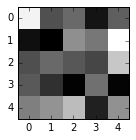

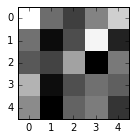

In [29]:
for i in range(conv1_weight_values.shape[-1]):
    plt.figure(figsize=(2, 2))
    plt.imshow(conv1_weight_values[:, :, 0, i], interpolation='nearest', cmap=plt.cm.gray)